## **Sort based on Key**

In [1]:
intervals = [(1,3),(8,10),(2,53),(15,18)]

k = sorted(intervals,key = lambda x : x[1])

print(k)

intervals = [(1,3),(8,10),(2,53),(15,18)]

k = sorted(intervals,key = lambda x : x[0])

print(k)

intervals = [[1,3],[2,99],[8,10],[15,18]]

k = sorted(intervals,key = lambda x : x[1])

print(k)

[(1, 3), (8, 10), (15, 18), (2, 53)]
[(1, 3), (2, 53), (8, 10), (15, 18)]
[[1, 3], [8, 10], [15, 18], [2, 99]]


## **Kadane's Algorithm : Maximum Subarray**

In [ ]:
import math
class Solution:
    def maxSubArray(self, nums) -> int:

        lm = 0
        gm = -math.inf

        for i in range(len(nums)):

            lm += nums[i]

            gm = max(lm,gm)

            if(lm < 0): lm = 0

        return gm

## **Merge Intervals**

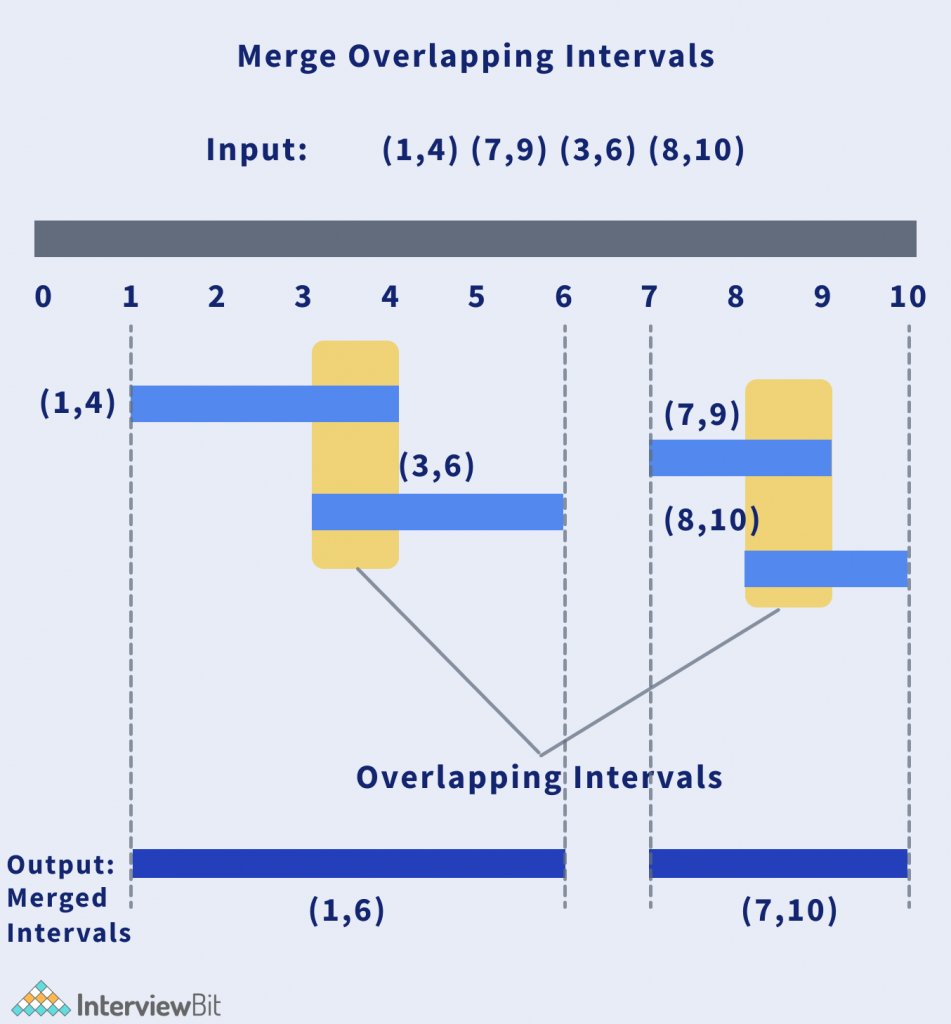

In [ ]:
class Solution:
    def merge(self, V):

        n = len(V)

        V.sort()

        idx = 0

        res = []

        for i in range(1,n):

            if(V[idx][1] >= V[i][0]):

                V[idx][0] = min(V[idx][0],V[i][0])
                V[idx][1] = max(V[idx][1],V[i][1])

            else:
                idx += 1
                V[idx] = V[i]

        return V[:idx+1]

## **121. Best Time to Buy and Sell Stock**

#### **Kadane's Algorithm**

In [ ]:
import math

class Solution:
    def maxProfit(self, prices) -> int:

        stockBought = math.inf
        profit = 0

        for i in range(len(prices)):
            stockBought = min(stockBought,prices[i])
            profit = max(profit,prices[i]-stockBought)
        
        return profit     

#### **DP**

In [ ]:
class Solution:
    
    def SBS(self, p, ind, buy, k):

        if ind >= len(p) or k <= 0:return 0

        if self.dp[ind][buy][k] != -1: return self.dp[ind][buy][k]

        profit = self.SBS(p, ind + 1, buy, k)

        if buy and k:
            profit = max(profit,-p[ind] + self.SBS(p, ind + 1, not buy, k))
        
        else:
            profit = max(profit,p[ind] + self.SBS(p, ind + 1, not buy, k - 1))

        self.dp[ind][buy][k] = profit

        return self.dp[ind][buy][k]

    def maxProfit(self, prices):
        k = 1  # change the value of k as per the question
        
        buy = True

        self.dp = [[[-1 for _ in range(k + 1)] for _ in range(3)] for _ in range(len(prices) + 1)]
        
        return self.SBS(prices, 0, buy, k)